# Example of simple nonlinear program

We'll look at two types of solvers we can use to for nonlinear programs.  The first one, called IPOPT, you can think of like GRG Nonlinear in Excel.  You can install this solver by running the next cell (uncomment it first!).

In [1]:
#!conda install -c conda-forge ipopt

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.6.2
  latest version: 4.6.7

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.



Let's suppose we have a smooth, nonlinear function of one variable defined on the interval [-1, 1].

In [60]:
import numpy as np

def nonlinear_function(x):
    return -((x - 0.5)**2 - 1)**2

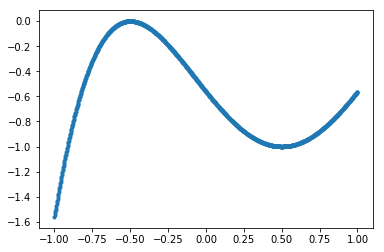

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-1, 1, 1000)
y = [nonlinear_function(xi) for xi in x]
_ = plt.scatter(x, y, marker='.')

We would like to find the point (-1, -1.5625) as the global minimum on this domain.

In [56]:
import pyomo.environ as pe

model = pe.ConcreteModel()

x_index = [1]
model.x = pe.Var(x_index, domain=pe.Reals, bounds=(-1, 1))

def objective(model):
    return nonlinear_function(model.x[1])
model.obj = pe.Objective(rule=objective)

In [57]:
# This is how you solve!
opt = pe.SolverFactory('ipopt')
result = opt.solve(model)

In [58]:
model.obj.expr()

-1.0

In [59]:
import pyomo
import pandas as pd

def parse_solution(model, index=None):

    # Extract variable names
    var = [x for x in model.component_map().keys() 
           if isinstance(getattr(model, x), pyomo.core.base.var.IndexedVar)]
    
    # Create dataframe, distinguising between first and second stage variables
    dfs = []
    for v in var:
        df = pd.DataFrame([x.value for x in model.component_map()[v].values()], columns=[v])
        dfs.append(df)
    dfs = pd.concat(dfs, axis=1)
    
    if index is not None:
        dfs.index = index
        
    return dfs


df = parse_solution(model)
df

,x
0,0.5
